# Spanish Translation A/B Test

Company XYZ is a worldwide e-commerce site with localized versions of the site.

A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than any other Spanish-speaking country. She therefore went and talked to the international team in charge of Spain And LatAm to see if they had any ideas about why that was happening.

Spain and LatAm country manager suggested that one reason could be translation. All Spanish- speaking countries had the same translation of the site which was written by a Spaniard. They agreed to try a test where each country would have its one translation written by a local. That is, Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican and so on. Obviously, nothing would change for users from Spain.
After they run the test however, they are really surprised cause the test is negative. I.e., it appears that the non-localized translation was doing better!

You are asked to:

1.Confirm that the test is actually negative. That is, it appears that the old version of the site with just one translation across Spain and LatAm performs better

2.Explain why that might be happening. Are the localized translations really worse?

3.If you identified what was wrong, design an algorithm that would return FALSE if the same problem is happening in the future and TRUE if everything is good and the results can be trusted.

# Data
We have 2 tables that can be found on this repo.
The 2 tables are:
## "test_table" - general information about the test results
### Columns:
**user_id** : the id of the user. Unique by user. Can be joined to user id in the other table.
For each user, we just check whether conversion happens the first time they land on the
site since the test started.  
**date** : when they came to the site for the first time since the test started         
**source** : marketing channel: Ads, SEO, Direct . Direct means everything except for ads
and SEO. Such as directly typing site URL on the browser, downloading the app w/o
coming from SEO or Ads, referral friend, etc.      
**device** : device used by the user. It can be mobile or web     
**browser_language** : in browser or app settings, the language chosen by the user. It can
be EN, ES, Other (Other means any language except for English and Spanish)      
**ads_channel** : if marketing channel is ads, this is the site where the ad was displayed. It
can be: Google, Facebook, Bing, Yahoo ,Other. If the user didn't come via an ad, this
field is NA     
**browser** : user browser. It can be: IE, Chrome, Android_App, FireFox, Iphone_App,
Safari, Opera     
**conversion** : whether the user converted (1) or not (0). This is our label. A test is
considered successful if it increases the proportion of users who convert.    
**test** : users are randomly split into test (1) and control (0). Test users see the new
translation and control the old one. For Spain-based users, this is obviously always 0
since there is no change there.    
## "user_table" - some information about the user
### Columns:
**user_id** : the id of the user. It can be joined to user id in the other table   
**sex** : user sex: Male or Female    
**age** : user age (self-reported)   
**country** : user country based on ip address

In [16]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from statsmodels.multivariate.manova import MANOVA

In [3]:
test_table = pd.read_csv('test_table.csv')
user_table = pd.read_csv('user_table.csv')
test_table.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [4]:
user_table.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [5]:
data = pd.merge(test_table, user_table, how='inner', on='user_id', left_on=None, right_on=None,
      left_index=False, right_index=False, sort=True,
      suffixes=('_x', '_y'), copy=True, indicator=False)
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,1,2015-12-02,SEO,Web,EN,NaN,Chrome,0,0,M,38,Chile
1,2,2015-11-30,SEO,Mobile,ES,NaN,Android_App,0,0,M,27,Colombia
2,3,2015-12-03,SEO,Mobile,ES,NaN,Iphone_App,0,1,M,18,Guatemala
3,5,2015-11-30,Ads,Web,ES,Facebook,Chrome,0,1,M,22,Argentina
4,8,2015-12-03,Ads,Mobile,ES,Google,Android_App,0,1,M,19,Venezuela


In [6]:
data.describe()

,user_id,conversion,test,age
count,452867.000000,452867.000000,452867.000000,452867.000000
mean,499944.805166,0.049560,0.476462,27.130740
std,288676.264784,0.217034,0.499446,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249819.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749543.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


In [11]:
data[['country', 'browser', 'ads_channel', 'device', 'source', 'date']].describe()

,country,browser,ads_channel,device,source,date
count,452867,452867,181693,452867,452867,452867
unique,17,7,5,2,3,5
top,Mexico,Android_App,Facebook,Web,Ads,2015-12-04
freq,128484,154977,68358,251316,181693,141024


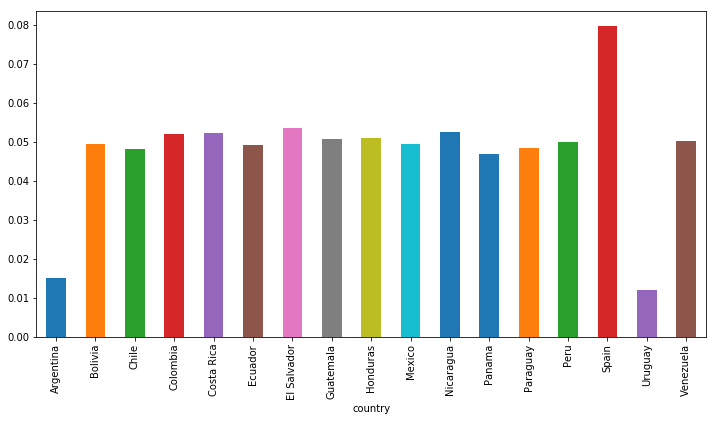

In [12]:
plt.figure(figsize=(12, 6))
data[data['test']==0].groupby('country')['conversion'].mean().plot(kind='bar')

In [12]:
print('Test proportion:')
print(sum(data['test'])/data.shape[0])
print('Control proportion:')
print(1-sum(data['test'])/data.shape[0])

Test proportion:
0.4764621842616044
Control proportion:
0.5235378157383956


In [14]:
print(stats.ttest_ind(data[(data['test']==0) & (data['country']!='Spain')]['conversion'], data[data['test']==1]['conversion'], equal_var = False))

Ttest_indResult(statistic=7.353895203080277, pvalue=1.9289178577799033e-13)


In [15]:
print('Conversion for control set:')
print(data[(data['test']==0) & (data['country']!='Spain')]['conversion'].mean())
print('Conversion for test set:')
print(data[data['test']==1]['conversion'].mean())

Conversion for control set:
0.04829179055749524
Conversion for test set:
0.043411161678422794


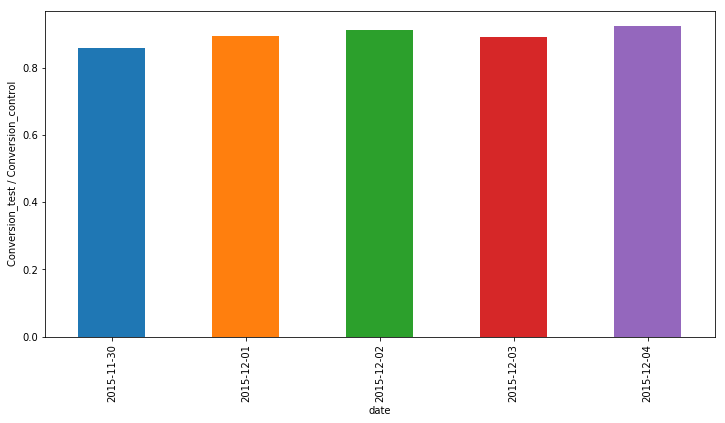

In [16]:
plt.figure(figsize=(12, 6))
plt.ylabel('Conversion_test / Conversion_control')
(data[(data['test']==1) & (data['country']!='Spain')].groupby('date')['conversion'].mean()
         /data[(data['test']==0) & (data['country']!='Spain')].groupby('date')['conversion'].mean()).plot(kind='bar')

### Invariant check

There should be no significant difference between test and control group in the distributions of date, source, device, ads_channel, browser, sex, age, country.
So, I am going to use t-test and  to check.

In [7]:
data.columns

Index(['user_id', 'date', 'source', 'device', 'browser_language',
       'ads_channel', 'browser', 'conversion', 'test', 'sex', 'age',
       'country'],
      dtype='object')

In [50]:
data0 = data.fillna('UNKONWN')
data1 = data0[data0['browser_language']=="ES"]
vars = list(data0.columns)
vars.remove('user_id')
vars.remove('browser_language')
vars.remove('conversion')
vars.remove('test')
data1_0=data0[['user_id','browser_language','conversion','test']]

In [58]:
for v in vars: 
    df = data[[v]]

    df2 = (pd.get_dummies(df, prefix='', prefix_sep='')
                   .max(level=0, axis=1)
                   .add_prefix(v+' - '))
    data1 = pd.concat([data, df2], axis=1)
    data1 = data1.drop([f], axis=1) 